In [4]:
import pandas as pd
from variables import FILENAME

df = pd.read_csv(FILENAME, sep=';')
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [5]:
df.head()

,tweet_id,tweet_text,created_at,author_id,author_name,author_username,retweet_count,reply_count,like_count,quote_count
0,1526946552492789760,Esta es la historia de Isis🤗 que decidió hacer...,2022-05-18 15:23:22+00:00,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0
1,1526886949839065088,Gracias @victorianoI y equipo por el análisis ...,2022-05-18 11:26:31+00:00,1162694149956603904,The Bridge,TheBridge_Tech,0,0,0,0
2,1526842834741039105,¿Cómo combatir el paro juvenil🥵? #tipdeldia En...,2022-05-18 08:31:13+00:00,1336771626306854912,Bcas,Bcasapp,4,1,8,0
3,1526479745185198080,Los perfiles tecnológicos más demandados en el...,2022-05-17 08:28:26+00:00,114739070,Periódico PublicidAD,PdelaPublicidad,2,0,1,0
4,1526133158743359488,La 2da presentación-coloquio del #LibroIC en #...,2022-05-16 09:31:13+00:00,15993641,Amalio A. Rey,arey,4,0,4,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         98 non-null     int64 
 1   tweet_text       98 non-null     object
 2   created_at       98 non-null     object
 3   author_id        98 non-null     int64 
 4   author_name      98 non-null     object
 5   author_username  98 non-null     object
 6   retweet_count    98 non-null     int64 
 7   reply_count      98 non-null     int64 
 8   like_count       98 non-null     int64 
 9   quote_count      98 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 7.8+ KB


In [31]:
df['tweet_text'] = df['tweet_text'].astype('string')
df['created_at']= pd.to_datetime(df['created_at'])
df['author_name'] = df['author_name'].astype('string')
df['author_username'] = df['author_username'].astype('string')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         98 non-null     int64              
 1   tweet_text       98 non-null     string             
 2   created_at       98 non-null     datetime64[ns, UTC]
 3   author_id        98 non-null     int64              
 4   author_name      98 non-null     string             
 5   author_username  98 non-null     string             
 6   retweet_count    98 non-null     int64              
 7   reply_count      98 non-null     int64              
 8   like_count       98 non-null     int64              
 9   quote_count      98 non-null     int64              
 10  month            98 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(7), string(3)
memory usage: 8.5 KB


### a. ¿Cuál es el tweet con mayor repercusión social?

In [21]:
max_likes = int(df[['like_count']].max())
df[df['like_count'] == max_likes]

,tweet_id,tweet_text,created_at,author_id,author_name,author_username,retweet_count,reply_count,like_count,quote_count
10,1519706866703638529,En breve empezamos la charla sobre RV y Psicol...,2022-04-28 15:55:26+00:00,3294953441,Jose Maria Torralba,JM_Torralba_,1,0,15,0


### b. ¿Cuál es el usuario que más menciona a la escuela?

El usuario que más la menciona @TheBridge_Tech es 'MujeresaSeguir', se excluyen asi
los 'retweets' y 'replies' del propio @TheBridge_Tech

In [27]:
df.groupby('author_name')[['tweet_text']].count().sort_values('tweet_text',ascending=False)

,tweet_text
author_name,
The Bridge,10
Mujeres a Seguir,7
Berta Otero,5
Indra,3
Fundación Universia,3
...,...
Kairós DS,1
Kreab España,1
Mar Lopez,1


### c. ¿En qué mes se concentra el mayor número de tweets?

In [33]:
df['month'] = list(map(lambda x: x.month, df['created_at']))

Abril es el mes que concentra el mayor número de tweetsde @TheBridge_Tech

In [30]:
df.groupby('month')[['tweet_text']].count().sort_values('tweet_text',ascending=False)

,tweet_text
month,
4,41
2,17
3,16
1,15
5,9


### d. ¿Qué palabras son más frecuentes?

In [24]:
from collections import Counter

Counter(" ".join(df["tweet_text"]).split()).most_common(100)

[('de', 160),
 ('en', 85),
 ('@TheBridge_Tech', 83),
 ('y', 58),
 ('la', 54),
 ('el', 54),
 ('que', 51),
 ('a', 46),
 ('con', 40),
 ('las', 30),
 ('para', 24),
 ('un', 21),
 ('una', 18),
 ('por', 17),
 ('los', 17),
 ('del', 16),
 ('lo', 13),
 ('es', 12),
 ('su', 12),
 ('#bootcamp', 9),
 ('sobre', 9),
 ('no', 8),
 ('@Globant', 8),
 ('te', 8),
 ('▪️', 8),
 ('becas', 8),
 ('Web', 8),
 ('@TheBridge_Tech.', 7),
 ('más', 7),
 ('digital', 7),
 ('se', 7),
 ('nos', 7),
 ('#mujerytecnología', 7),
 ('este', 7),
 ('personas', 7),
 ('Desarrollo', 7),
 ('Full-stack', 7),
 ('El', 6),
 ('hay', 6),
 ('futuro', 6),
 ('La', 6),
 ('todos', 6),
 ('junto', 6),
 ('@bertinha84', 6),
 ('@IndraCompany', 6),
 ('#discapacidad', 6),
 ('#STEM', 6),
 ('tu', 5),
 ('En', 5),
 ('Si', 5),
 ('the', 5),
 (',', 5),
 ('todo', 5),
 ('Inteligencia', 5),
 ('Artificial', 5),
 ('@Adalab_Digital', 5),
 ('alumnos', 5),
 ('curso', 5),
 ('realización', 5),
 ('💻', 5),
 ('dirigidas', 5),
 ('formaciones', 5),
 ('10', 5),
 ('profesional

### e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

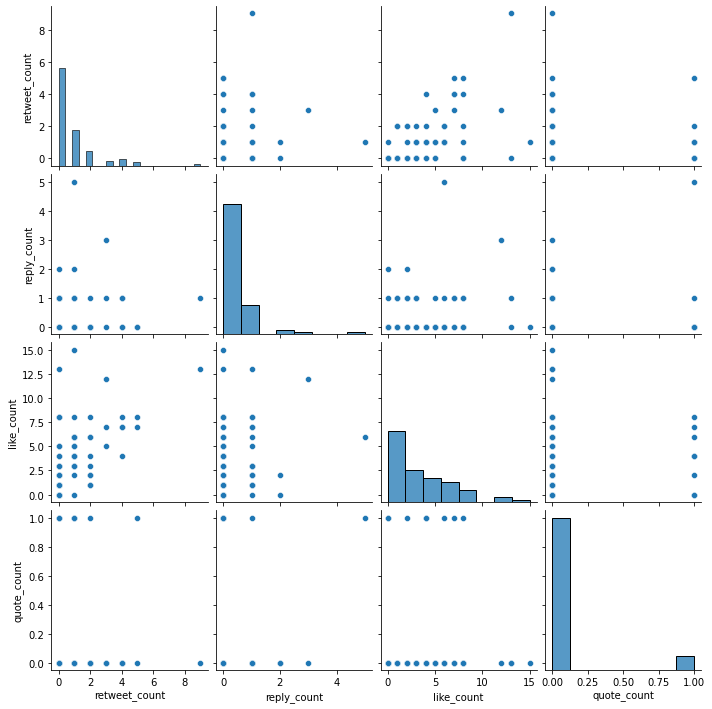

In [36]:
import seaborn as sns

sns.pairplot(df, vars=['retweet_count', 'reply_count', 'like_count', 'quote_count'])

No significant correlation